# 3.0 Feature Selection

For KNN classification, both covariance and correlation are important:

1. Covariance: High covariance between two features might suggest redundancy, which is not ideal for KNN as it may skew the distance calculations. KNN does not inherently account for feature redundancy, so it can be beneficial to remove or combine highly covariant features to simplify the feature space.

2. Correlation: Correlation is a scaled version of covariance that tells you the strength and direction of a linear relationship between two variables. In KNN, features that are highly correlated with the target variable may be particularly useful, whereas features with low correlation may not contribute much to the classification and could potentially be excluded to simplify the model.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
data = pd.read_csv("dataset/pose_data_augmented_res2.csv")

raw_features = data.iloc[:,4:103]
added_features = data.iloc[:,112:]
all_features = data.iloc[:,4:] 

raw_features

,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,landmark_01_z,landmark_02_x,landmark_02_y,landmark_02_z,landmark_03_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
0,0.545408,0.740922,-0.407526,0.529543,0.728610,-0.377108,0.529986,0.724919,-0.377690,0.530451,...,0.468260,0.301245,0.325765,-0.279319,0.178496,0.312144,0.396094,0.165575,0.312704,-0.299426
1,0.607888,0.740922,-0.306625,0.586982,0.728610,-0.279425,0.587520,0.724919,-0.279921,0.587934,...,0.514853,0.345172,0.325765,-0.222765,0.107004,0.312144,0.421072,0.215054,0.312704,-0.266125
2,0.651898,0.740922,-0.196408,0.626586,0.728610,-0.173252,0.627202,0.724919,-0.173647,0.627552,...,0.545803,0.378611,0.325765,-0.159442,0.032260,0.312144,0.433256,0.257999,0.312704,-0.224739
3,0.676100,0.740922,-0.080224,0.647152,0.728610,-0.061814,0.647827,0.724919,-0.062097,0.648103,...,0.560169,0.400546,0.325765,-0.091275,-0.043465,0.312144,0.432276,0.293105,0.312704,-0.176523
4,0.679759,0.740922,0.038399,0.648054,0.728610,0.051502,0.648768,0.724919,0.051341,0.648962,...,0.557515,0.410310,0.325765,-0.020334,-0.117868,0.312144,0.418161,0.319305,0.312704,-0.122944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.221597,0.731075,-0.655868,0.241815,0.751349,-0.633527,0.239539,0.752497,-0.631352,0.237434,...,-0.188110,0.205020,0.697971,-0.118801,0.537527,0.136663,-0.257138,0.179851,0.763012,-0.090221
19580,0.332121,0.731075,-0.607424,0.348152,0.751349,-0.581912,0.345533,0.752497,-0.580165,0.343013,...,-0.089076,0.222535,0.697971,-0.081394,0.574013,0.136663,-0.159891,0.192785,0.763012,-0.057619
19581,0.432553,0.731075,-0.540524,0.443911,0.751349,-0.512615,0.441028,0.752497,-0.511350,0.438171,...,0.012664,0.233288,0.697971,-0.041515,0.593057,0.136663,-0.057786,0.199862,0.763012,-0.023267
19582,0.519843,0.731075,-0.457200,0.526182,0.751349,-0.427743,0.523123,0.752497,-0.426997,0.520014,...,0.114019,0.236953,0.697971,-0.000374,0.594081,0.136663,0.046075,0.200866,0.763012,0.011792


## 3.1 Data Covariance

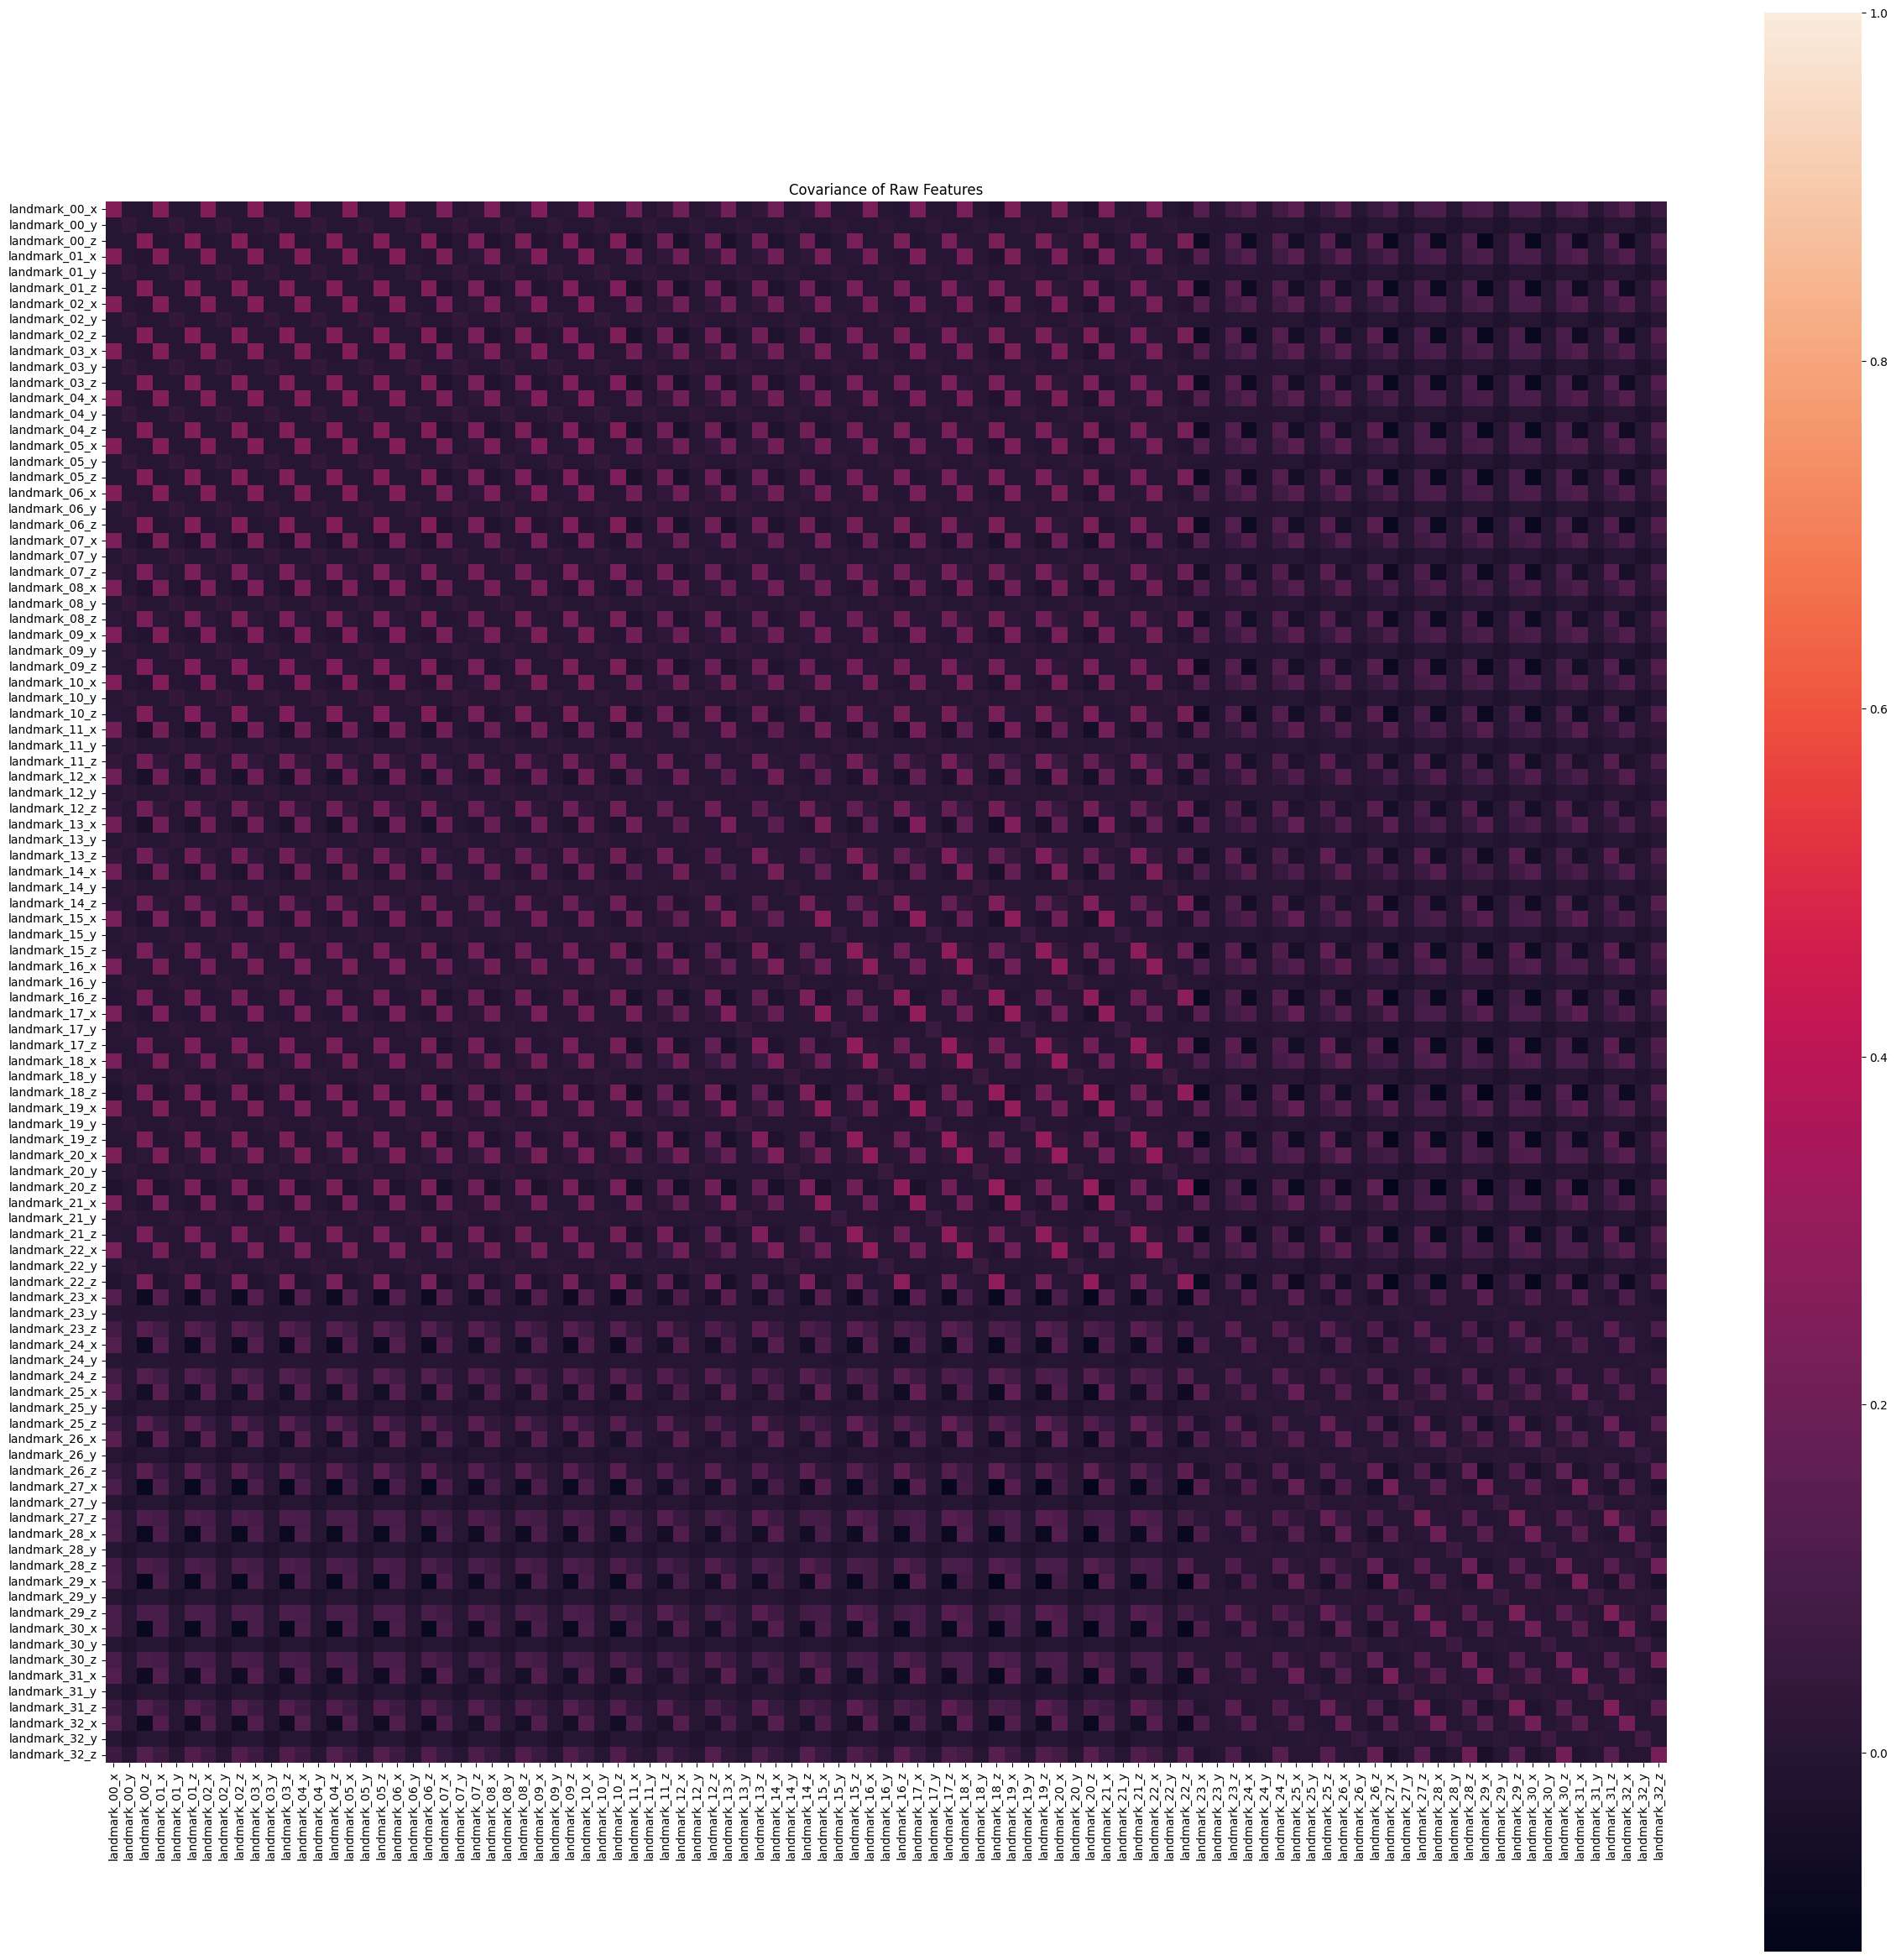

In [39]:
raw_features_cov = raw_features.cov()
plt.figure(figsize=(30, 30))
sns.heatmap(raw_features_cov, vmax=1, square=True)
plt.title("Covariance of Raw Features")
plt.savefig("features_raw_cov.png")
plt.show()

In [49]:
high_covariance_threshold = 0.25

high_cov_pairs = []
for i in raw_features_cov.columns:
    for j in raw_features_cov.index[raw_features_cov.index > i]:
        if abs(raw_features_cov.loc[i, j]) > high_covariance_threshold:
            high_cov_pairs.append((i, j, raw_features_cov.loc[i, j]))

for pair in high_cov_pairs:
    print(f"Features {pair[0]} and {pair[1]} have a high covariance of {pair[2]:.2f}")

Features landmark_00_x and landmark_01_x have a high covariance of 0.25
Features landmark_00_x and landmark_02_x have a high covariance of 0.26
Features landmark_00_x and landmark_03_x have a high covariance of 0.26
Features landmark_00_x and landmark_04_x have a high covariance of 0.25
Features landmark_00_x and landmark_05_x have a high covariance of 0.25
Features landmark_00_x and landmark_06_x have a high covariance of 0.25
Features landmark_00_z and landmark_01_z have a high covariance of 0.25
Features landmark_00_z and landmark_02_z have a high covariance of 0.26
Features landmark_00_z and landmark_03_z have a high covariance of 0.26
Features landmark_00_z and landmark_04_z have a high covariance of 0.25
Features landmark_00_z and landmark_05_z have a high covariance of 0.25
Features landmark_00_z and landmark_06_z have a high covariance of 0.25
Features landmark_01_x and landmark_02_x have a high covariance of 0.25
Features landmark_01_x and landmark_03_x have a high covariance 

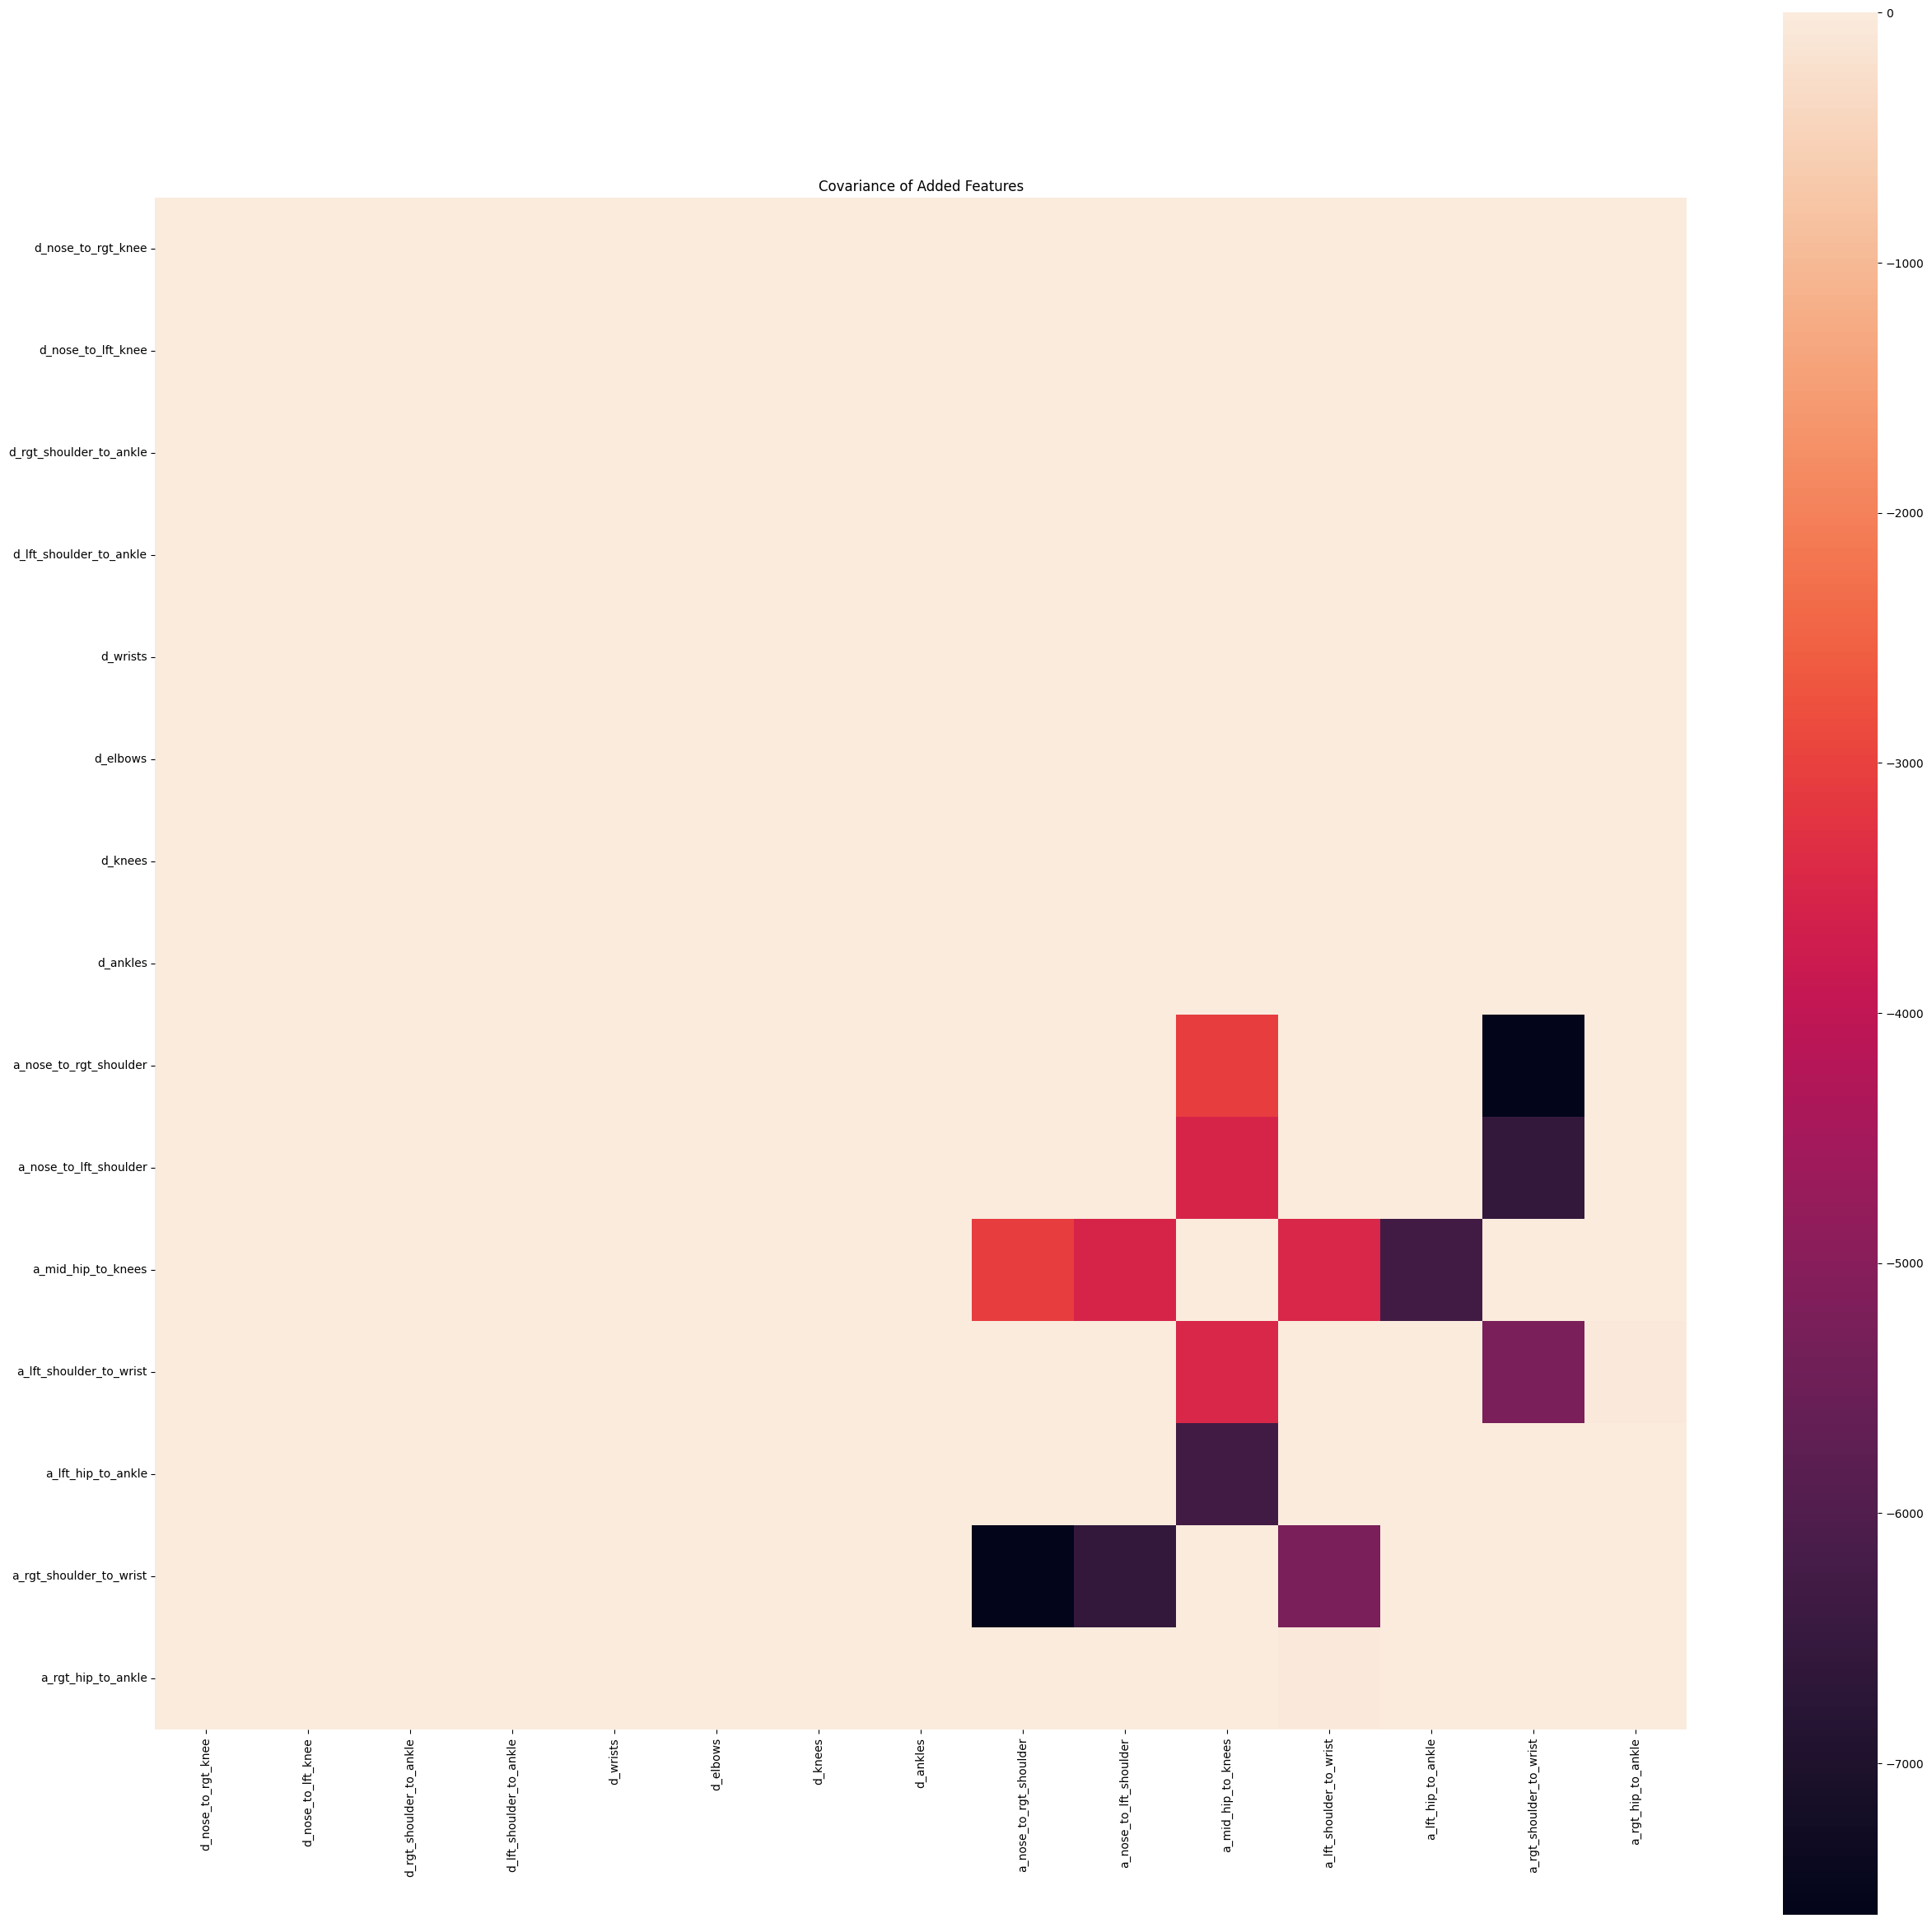

In [40]:
added_features_cov = added_features.cov()
plt.figure(figsize=(30, 30))
sns.heatmap(added_features_cov, vmax=1, square=True)
plt.title("Covariance of Added Features")
plt.savefig("features_add_cov.png")
plt.show()

In [41]:
high_covariance_threshold = 5000

high_cov_pairs = []
for i in data_covariance2.columns:
    for j in data_covariance2.index[data_covariance2.index > i]:
        if abs(data_covariance2.loc[i, j]) > high_covariance_threshold:
            high_cov_pairs.append((i, j, data_covariance2.loc[i, j]))

for pair in high_cov_pairs:
    print(f"Features {pair[0]} and {pair[1]} have a high covariance of {pair[2]:.2f}")

Features a_nose_to_rgt_shoulder and a_rgt_shoulder_to_wrist have a high covariance of -7605.98
Features a_nose_to_lft_shoulder and a_nose_to_rgt_shoulder have a high covariance of 15214.32
Features a_nose_to_lft_shoulder and a_rgt_shoulder_to_wrist have a high covariance of -6591.15
Features a_mid_hip_to_knees and a_rgt_hip_to_ankle have a high covariance of 6840.27
Features a_lft_shoulder_to_wrist and a_nose_to_rgt_shoulder have a high covariance of 6324.94
Features a_lft_shoulder_to_wrist and a_nose_to_lft_shoulder have a high covariance of 7244.88
Features a_lft_shoulder_to_wrist and a_rgt_shoulder_to_wrist have a high covariance of -5236.55
Features a_lft_hip_to_ankle and a_mid_hip_to_knees have a high covariance of -6293.08
Features a_lft_hip_to_ankle and a_rgt_hip_to_ankle have a high covariance of 5939.34


### **Based on covarriance magnitude results:**

1. The pair with the highest positive covariance is a_nose_to_lft_shoulder and a_nose_to_rgt_shoulder (15214.32). This suggests these two features move together in the same direction and may be redundant. One of these could be a candidate for removal.
2. The pairs involving a_lft_shoulder_to_wrist with both a_nose_to_rgt_shoulder and a_nose_to_lft_shoulder also have high positive covariances (6324.94 and 7244.88, respectively), suggesting similarity in their movement. Given the higher covariance with a_nose_to_lft_shoulder, a_lft_shoulder_to_wrist and a_nose_to_lft_shoulder might be more redundant.
3. The features a_lft_hip_to_ankle and a_mid_hip_to_knees have a high negative covariance (-6293.08), which suggests they move in opposite directions and one of them might be redundant.

## Features Correlation

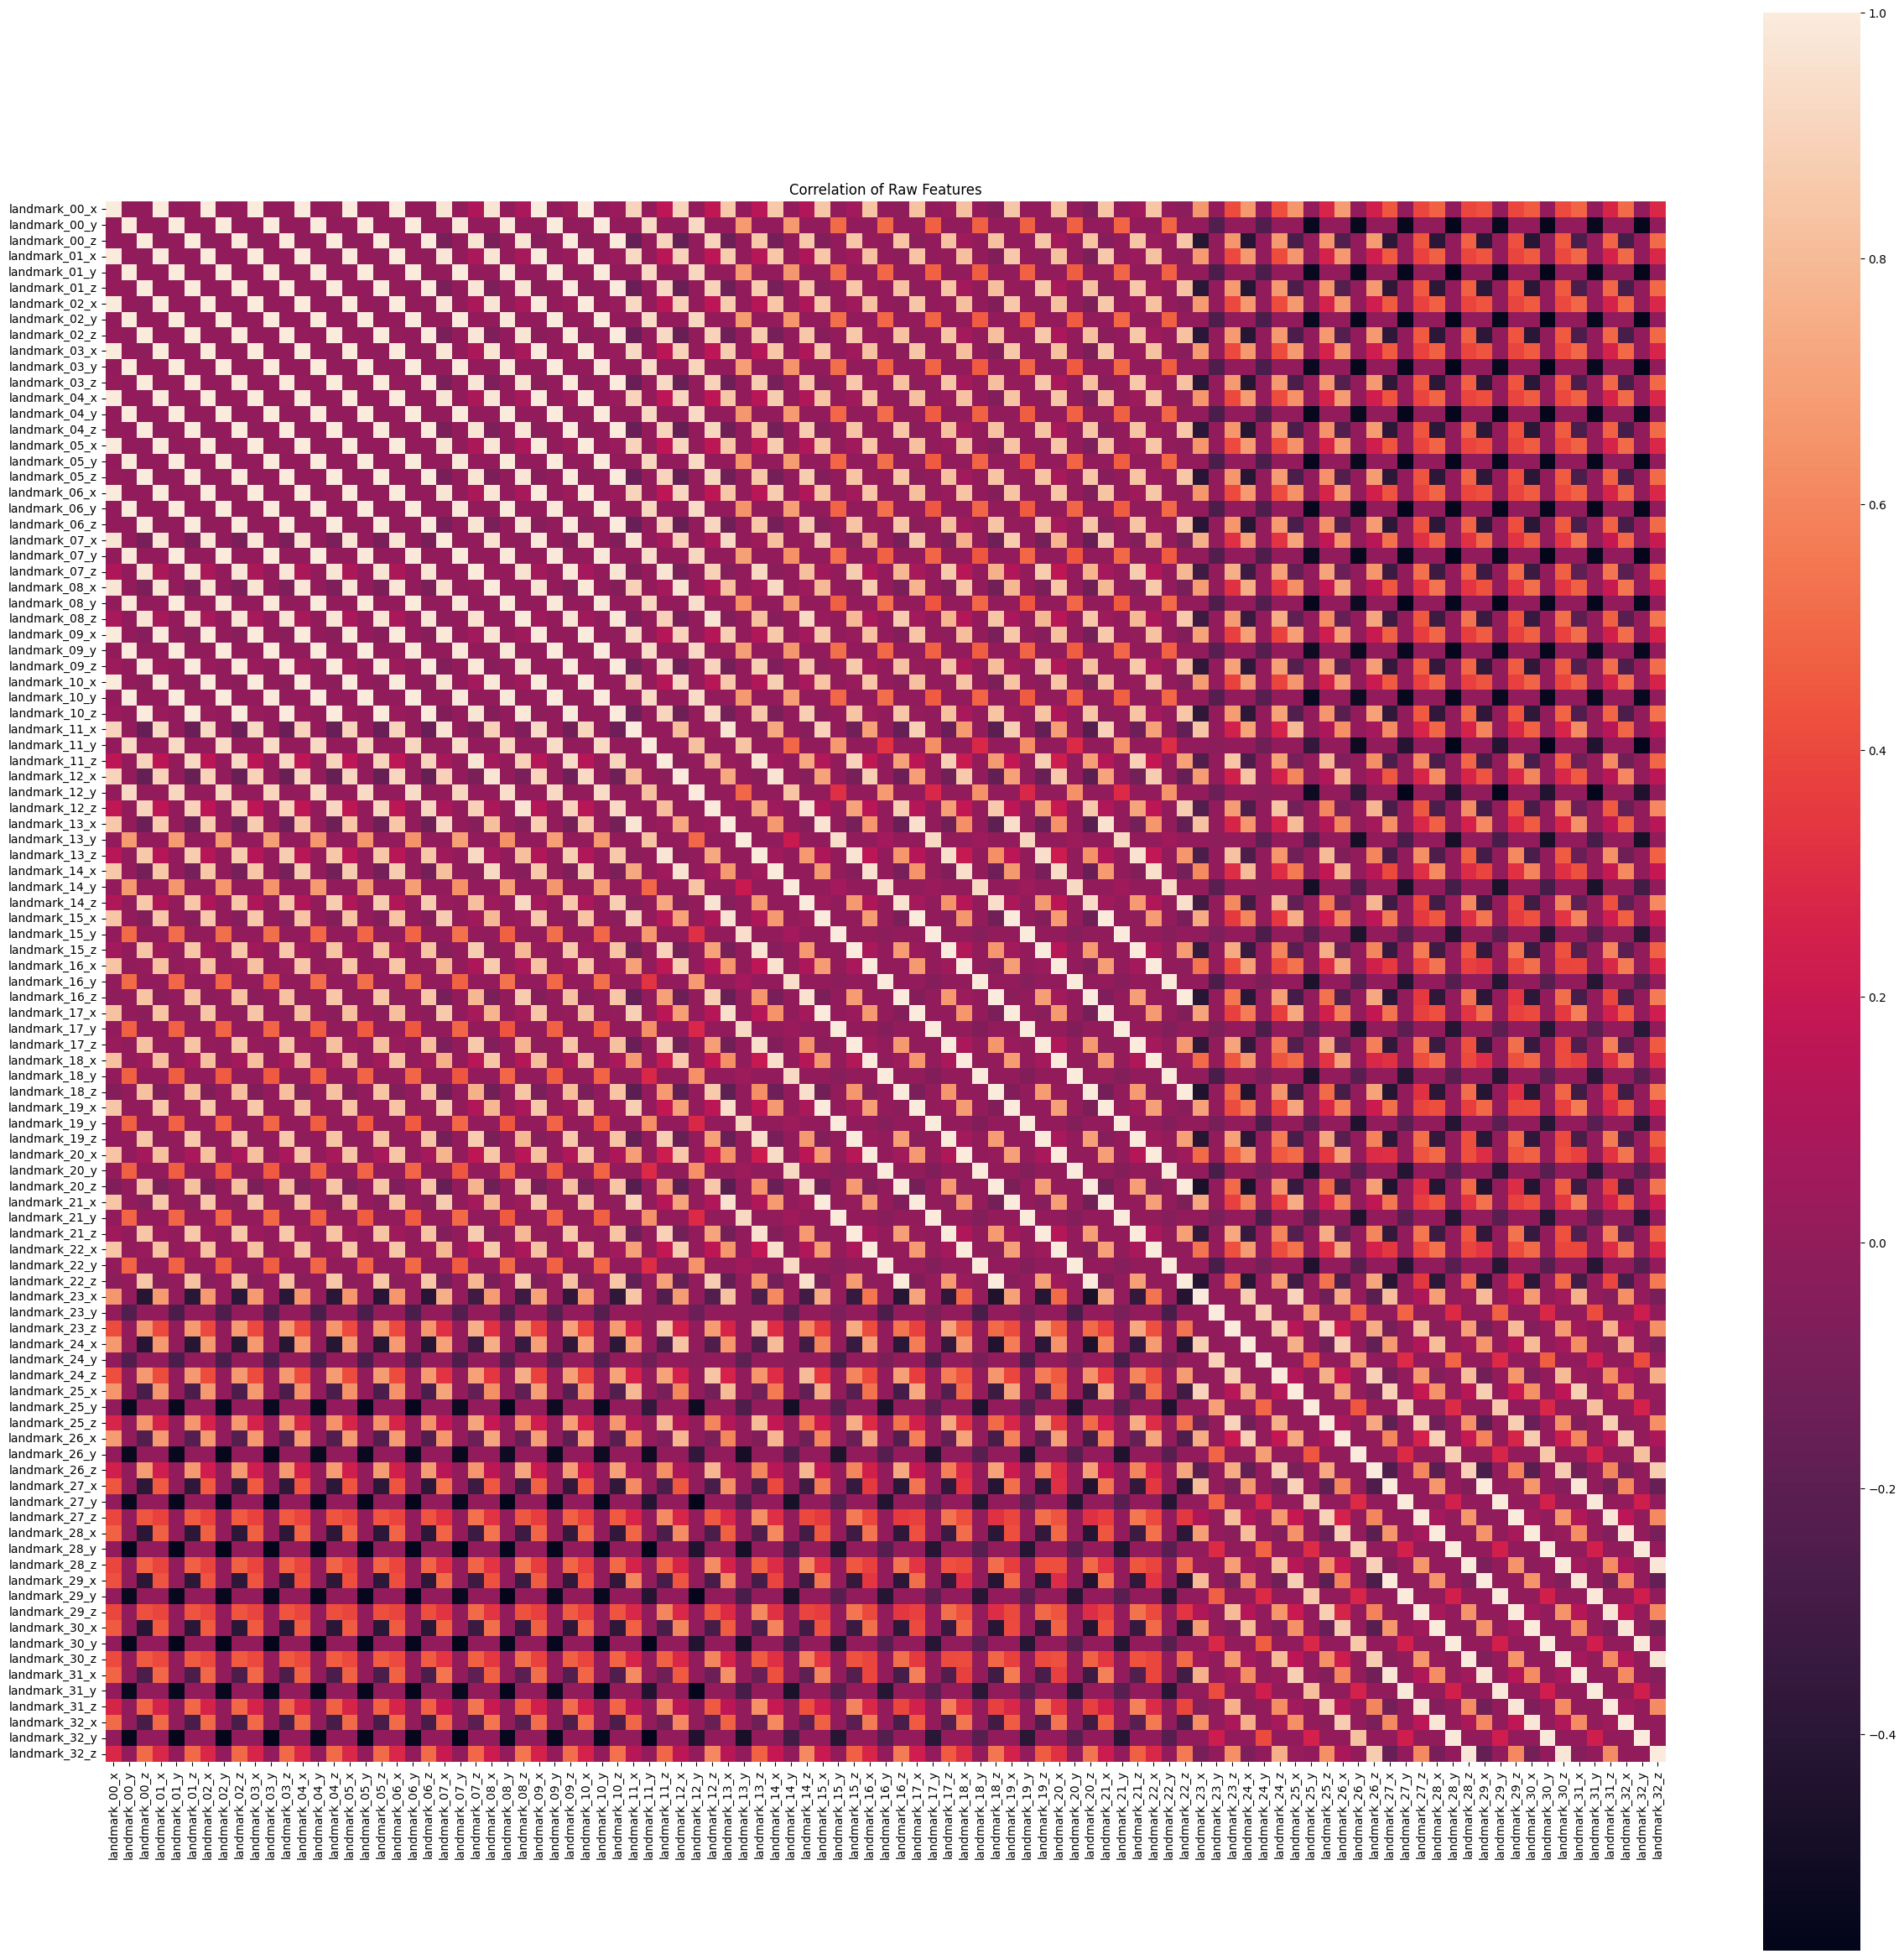

In [51]:
raw_features_corr = raw_features.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(raw_features_corr, vmax=1, square=True) 
plt.title("Correlation of Raw Features")
plt.savefig("features_raw_corr.png")
plt.show()

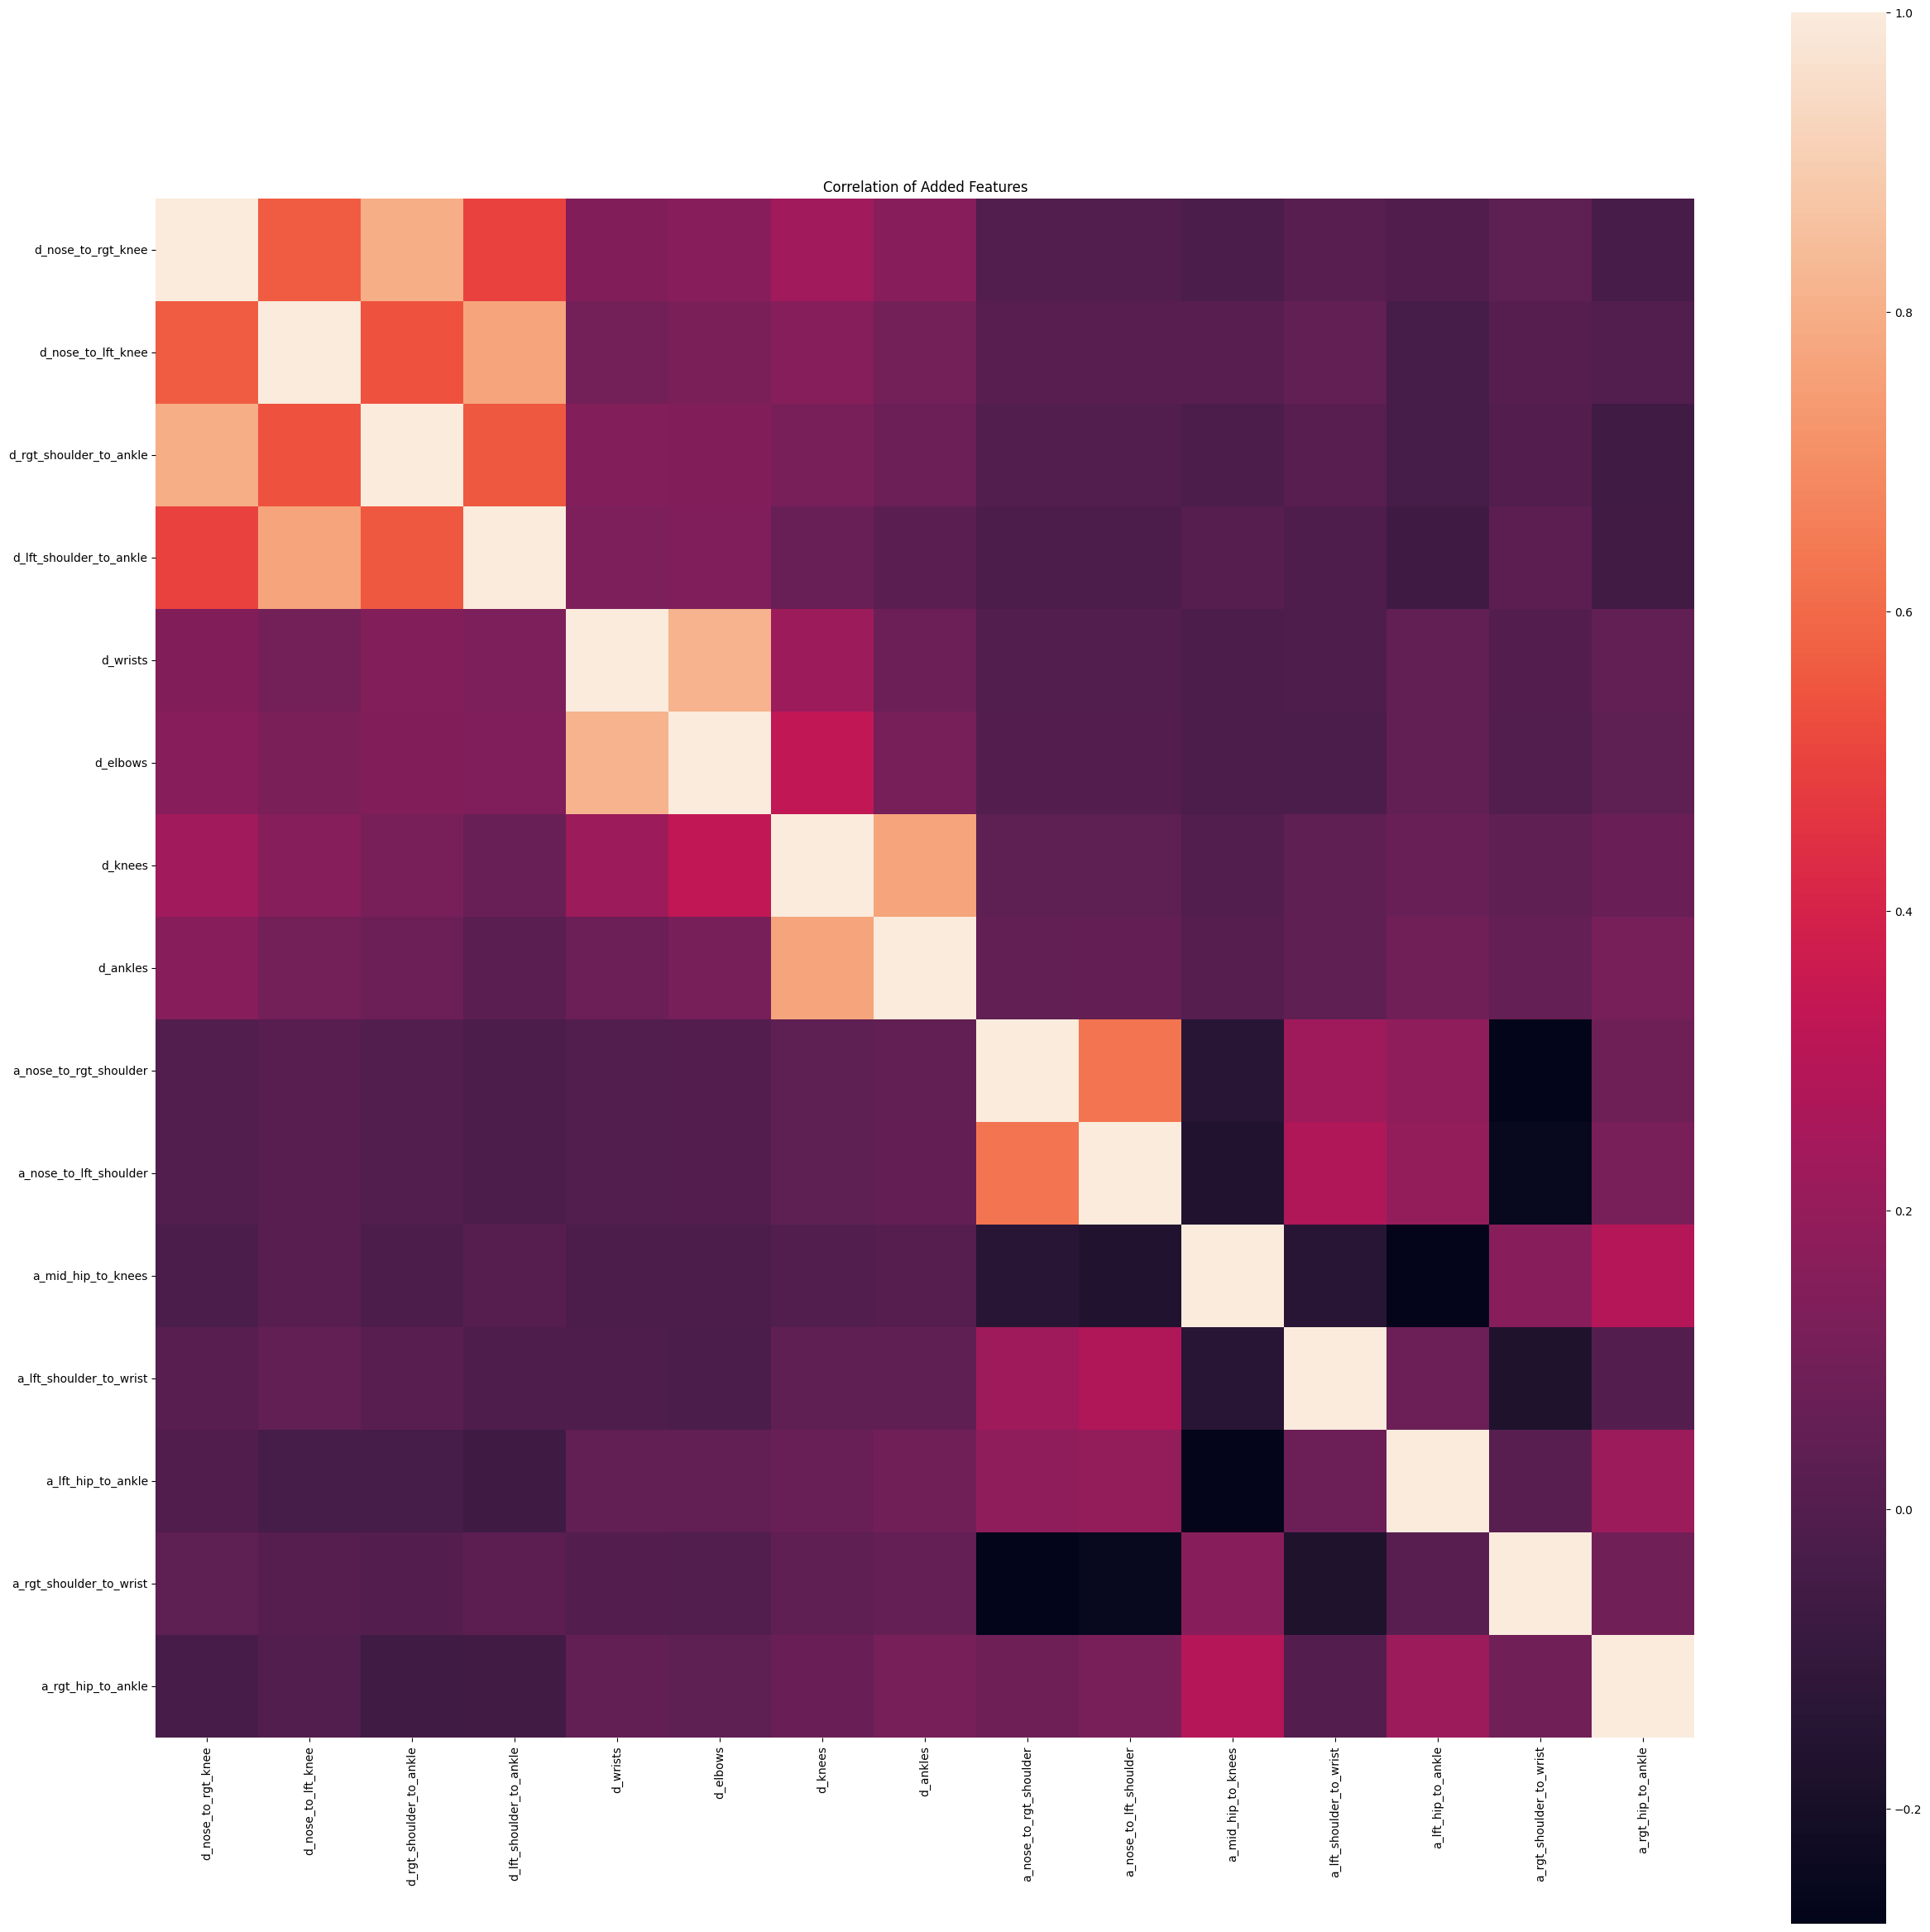

In [52]:
added_features_corr = added_features.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(added_features_corr, vmax=1, square=True) 
plt.title("Correlation of Added Features")
plt.savefig("features_add_corr.png")
plt.show()